In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('finance_liquor_sales.csv')

# Βασικές πληροφορίες
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  200 non-null    object 
 1   date                     200 non-null    object 
 2   store_number             200 non-null    int64  
 3   store_name               200 non-null    object 
 4   address                  200 non-null    object 
 5   city                     200 non-null    object 
 6   zip_code                 200 non-null    float64
 7   store_location           182 non-null    object 
 8   county_number            199 non-null    float64
 9   county                   199 non-null    object 
 10  category                 197 non-null    float64
 11  category_name            191 non-null    object 
 12  vendor_number            200 non-null    float64
 13  vendor_name              200 non-null    object 
 14  item_number              2

Data Prep
Εξαγωγή και καθαρισμός των δεδομένων για τη διαχείριση ελλιπών ή ασυνεπών τιμών.

In [46]:
print(df.isnull().sum)

<bound method DataFrame.sum of      invoice_and_item_number   date  store_number  store_name  address   city  \
0                      False  False         False       False    False  False   
1                      False  False         False       False    False  False   
2                      False  False         False       False    False  False   
3                      False  False         False       False    False  False   
4                      False  False         False       False    False  False   
..                       ...    ...           ...         ...      ...    ...   
195                    False  False         False       False    False  False   
196                    False  False         False       False    False  False   
197                    False  False         False       False    False  False   
198                    False  False         False       False    False  False   
199                    False  False         False       False    False  False 

In [47]:
df_clean = df.drop_duplicates(keep=False)

df_clean = df.dropna()
#print(df_clean)
print(df_clean.isnull().sum)

<bound method DataFrame.sum of      invoice_and_item_number   date  store_number  store_name  address   city  \
0                      False  False         False       False    False  False   
1                      False  False         False       False    False  False   
3                      False  False         False       False    False  False   
4                      False  False         False       False    False  False   
5                      False  False         False       False    False  False   
..                       ...    ...           ...         ...      ...    ...   
194                    False  False         False       False    False  False   
195                    False  False         False       False    False  False   
196                    False  False         False       False    False  False   
197                    False  False         False       False    False  False   
198                    False  False         False       False    False  False 

εύρεση των πιο δημοφιλών ειδών και των πωλήσεων των καταστημάτων.

In [51]:


famekind = df_clean.groupby(['zip_code','item_description'])['bottles_sold'].sum().reset_index()
topkinds = famekind.nlargest(173 ,'bottles_sold')
print(topkinds)





     zip_code          item_description  bottles_sold
120   52314.0           Juarez Gold Dss          1980
62    50702.0         Tortilla Gold Dss           768
2     50010.0  Member's Mark Spiced Rum           288
76    51106.0    Rumchata w/Thermal Cup           270
74    51106.0     Kahlua Coffee Liqueur           240
..        ...                       ...           ...
12    50208.0  Glenmorangie Taster Pack             1
157   52726.0         Templeton 4YR Rye             1
103   52172.0             Kahlua Coffee             1
112   52241.0              Bacardi Gold             1
63    50703.0              Bacardi Gold             1

[167 rows x 3 columns]


πωλήσεων των καταστημάτων.Υπολογισμός του ποσοστιαίου μεριδίου κάθε καταστήματος στα συνολικά έσοδα πωλήσεων σε όλο το σύνολο δεδομένων.

In [67]:
sales = df_clean.groupby('store_name')['sale_dollars'].sum().reset_index()
total = df_clean['sale_dollars'].sum()

sales['percent'] = (df_clean['sale_dollars'] / total) * 100
sales = sales.sort_values('percent', ascending=False).head(15)
print(sales)

                               store_name  sale_dollars   percent
57             Hy-Vee Food Store / Keokuk       2458.50  5.375080
68   Hy-Vee Wine and Spirits / Shenandoah         62.95  5.010702
16    Fareway Stores #138 / Pleasant Hill       2295.00  3.758027
49        Hy-Vee Food Store / Cedar Falls         72.00  3.615723
87              Pit Stop Liquors / Newton         22.26  2.905406
100           Sam's Club 8238 / Davenport       1264.80  2.503347
24                Food Land Super Markets         13.26  2.222970
115          Wal-Mart 0581 / Marshalltown         88.80  1.803853
45    Hy-Vee Food Store #3 / Cedar Rapids         32.52  1.627476
72               Iowa Street Market, Inc.         73.40  1.563339
81         Main Street Liquors / Hawarden         67.50  1.535725
12                 Depot Liquor & Grocery        112.47  1.473815
52          Hy-Vee Food Store / Fairfield         21.78  1.396316
8                   Cedar Ridge Vineyards       6403.50  1.303228
25       G

Δημιουργία σαφών, πληροφοριακών γραφημάτων

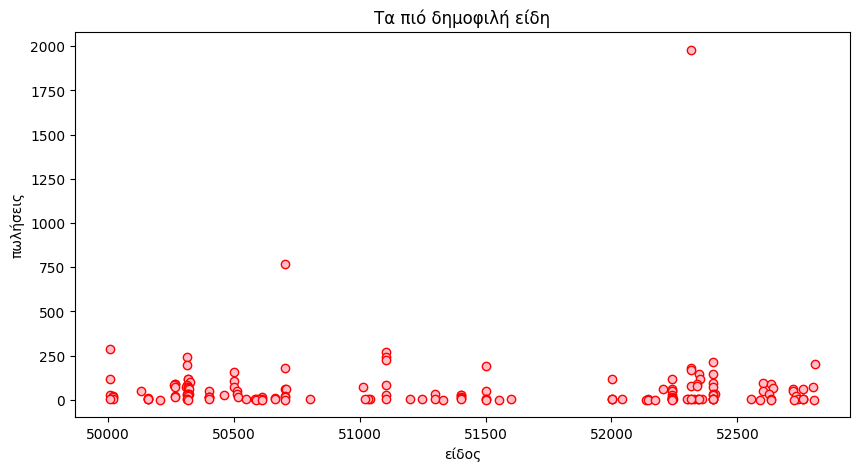

In [68]:
#rabdogramma me ta pio dimofili eidi
plt.figure(figsize=(10,5))
#plt.bar(topkinds['item_description'],topkinds['bottles_sold'],color = 'pink' ,edgecolor = 'red')
plt.scatter(topkinds['zip_code'],topkinds['bottles_sold'],color = 'pink' ,edgecolor = 'red')
plt.title('Τα πιό δημοφιλή είδη')
plt.xlabel('είδος')
plt.ylabel('πωλήσεις')
plt.show()

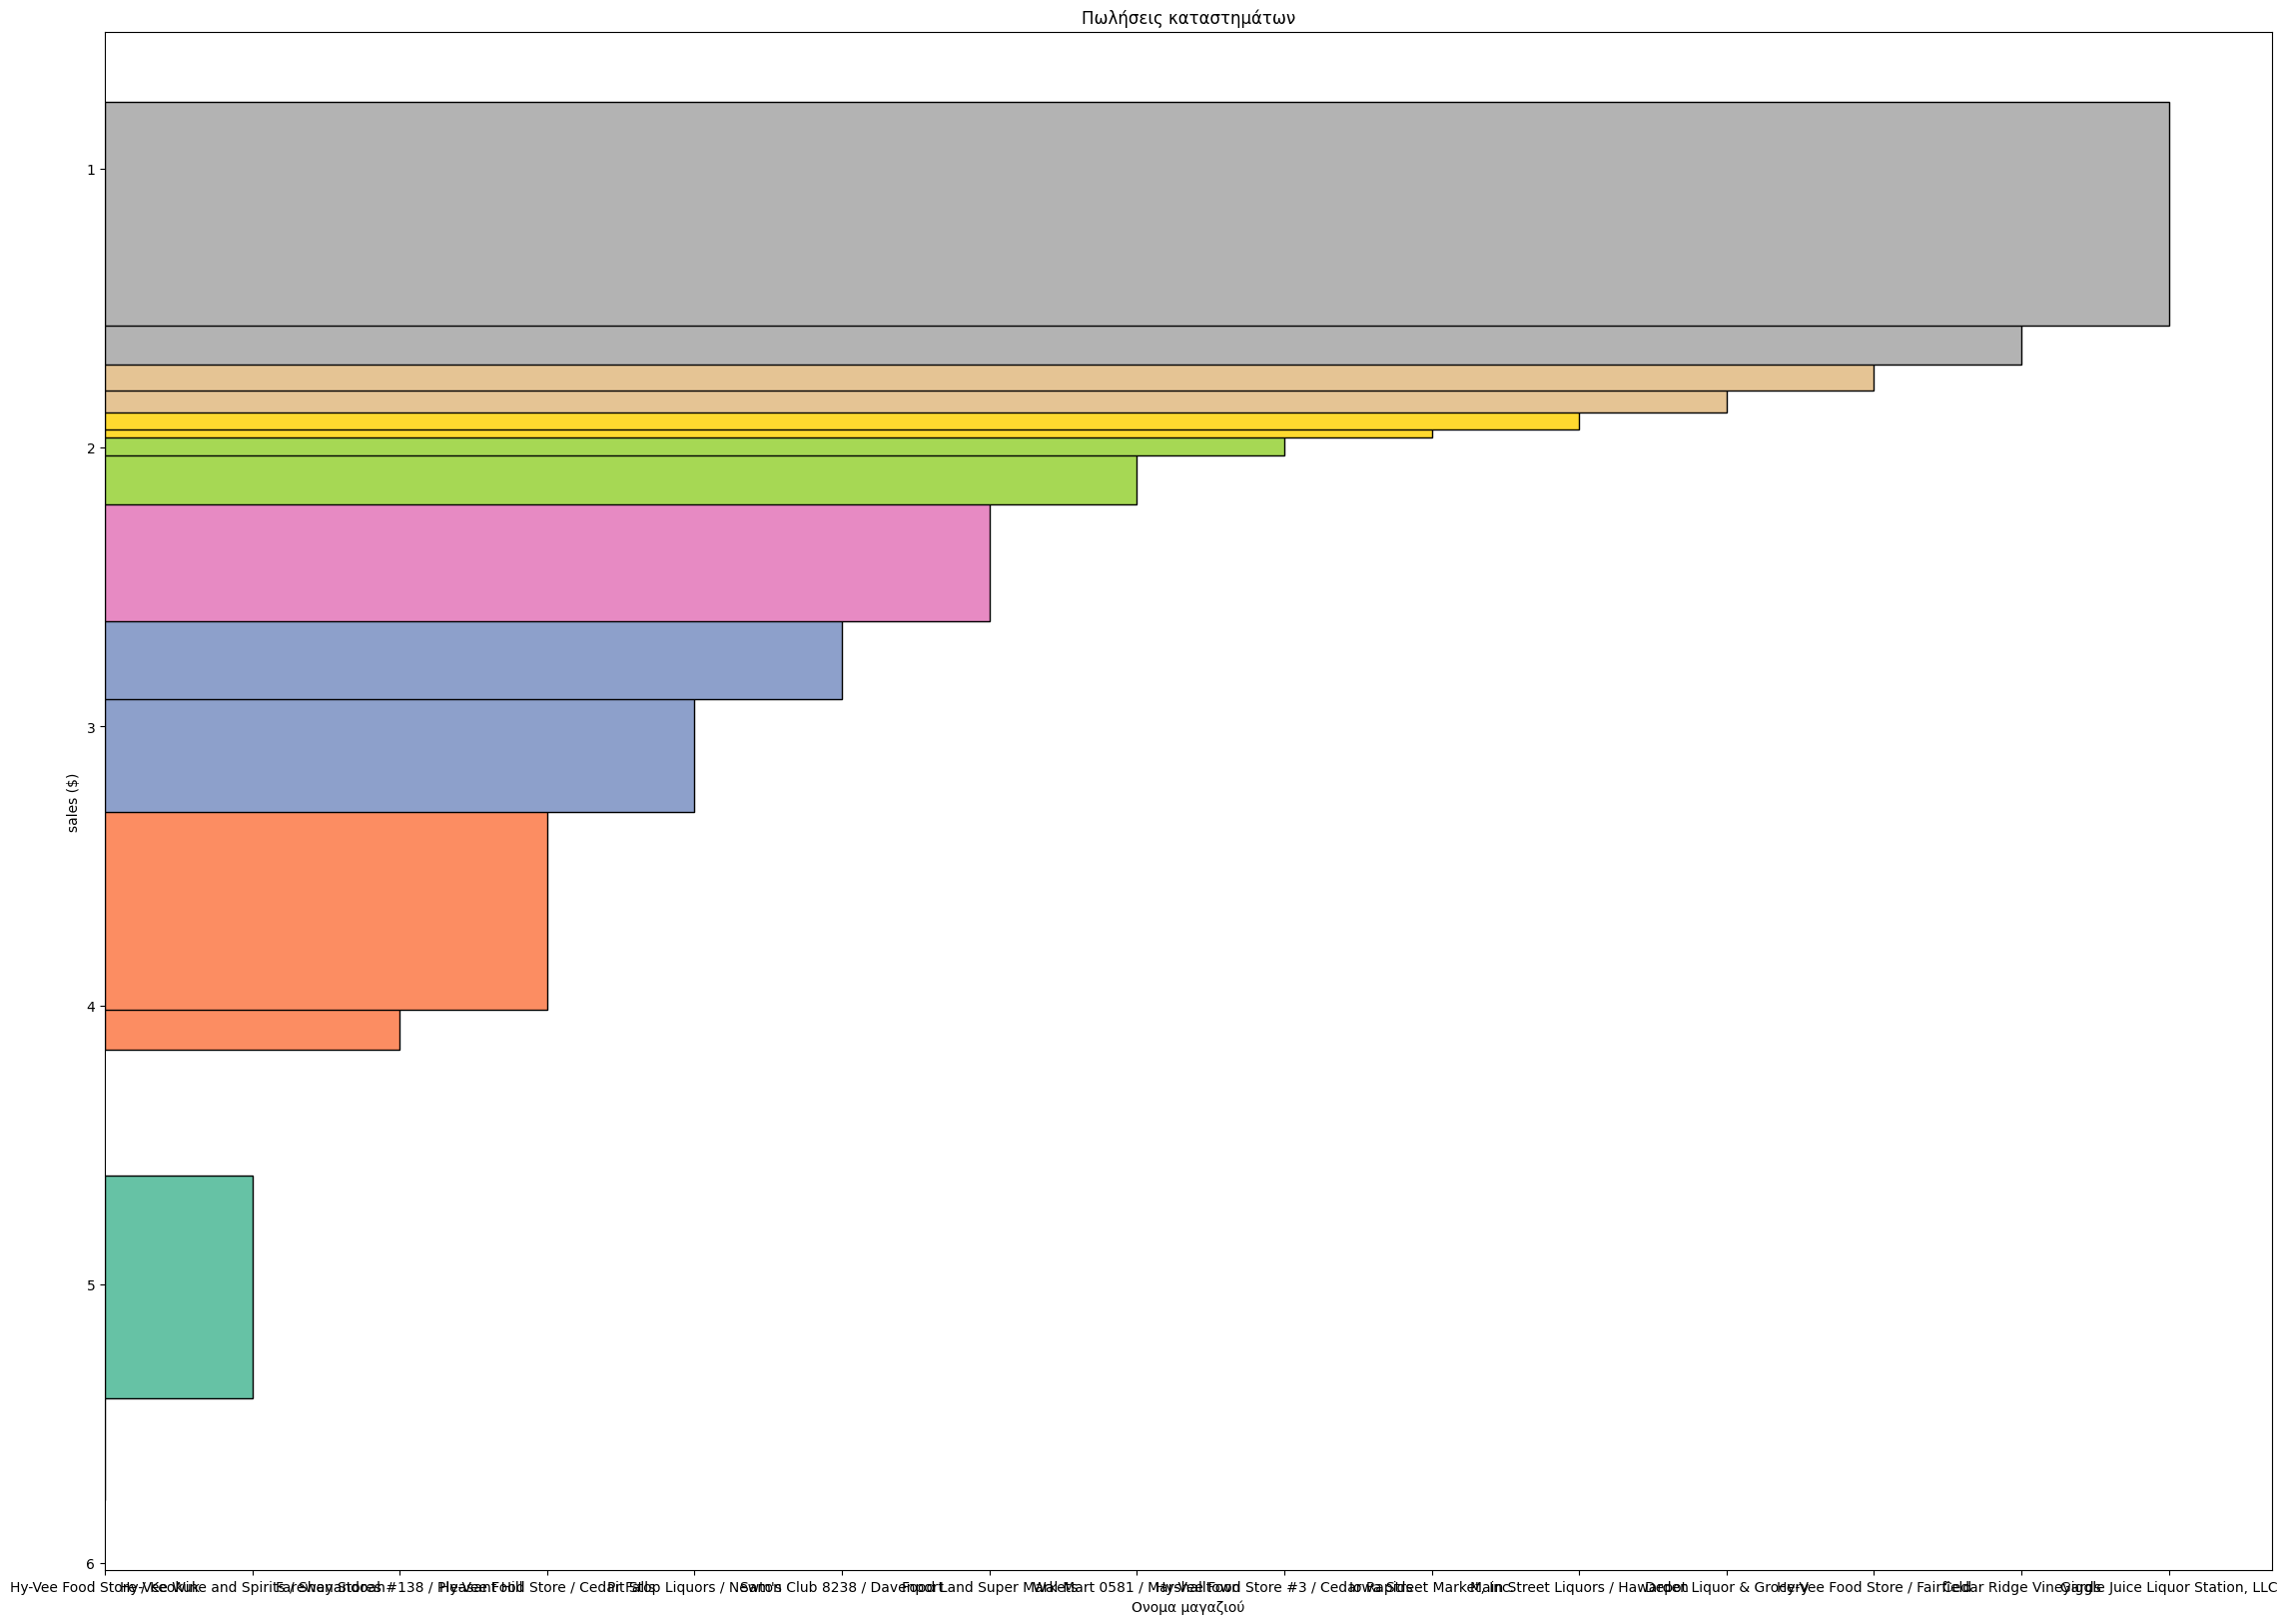

In [74]:
#rabdogramma me tis poliseis kathe katastimatos
plt.figure(figsize=(28,20))
colors = plt.cm.Set2(np.linspace(0, 1, len(sales)))

plt.barh(sales['percent'],sales['store_name'],color=colors ,edgecolor = 'black')
plt.title('Πωλήσεις καταστημάτων')
plt.xlabel('Ονομα μαγαζιού')
plt.gca().invert_yaxis()
plt.ylabel('sales ($)')
plt.show()

Τεκμηρίωση των μεθόδων, της ανάλυσης και των γνώσεών σας σε μια ολοκληρωμένη αναφορά.

Εκτελείται διερευνητική ανάλυση στο αρχείο csv finance_liquor_sales.Χρησιμοποιήθηκαν οι βιβλιοθήκες pandas numpy matplotlib.
Έγινε καθαρισμός, ανάλυση και οπτικοποίηση των δεδομένων με δύο διαγράμματα.

Εκτελέστηκε σε αρχείο notebook σε περιβάλλον vs code με την γλώσσα python.

Ο καθαρισσμός των δεδομένων ήταν η αφαίρεση διπλότυπων και null τιμών,ώστε το αρχείο να είναι συμπυκνωμένο και ευανάγνωστο.
Έπειτα,γίνεται ομαδοποίηση των δεδομένων.Δηλαδή,ομαδοποιούμε κατά zip_code και περιγραφή αντικειμένου για να αναπαρασταθούν πλήρως τα πιό δημοφιλή είδη.Τέλος ταξινομούνται κατά φθίνουσα σειρά για να διευκολυνθεί η εύρεση του δημοφιλέστερου προιόντος από τον αριθμό των μπουκαλιών που πουλήθηκαν.Επιπλέον, ομαδοποιούνται τα δεδομένα ανά όνομα καταστήματος και γίνονται υπολογισμοί του ποσσοστού των συνολικών πωλήσεων.Μέ αυτόν τον τρόπο εμφανίζονται οι πωλήσεις ανα κατάστημα,ταξινομημένα κατά φθίνουσα σειρά.


Η αναπαράσταση των δεδομένων με Matplotlib

Πρώτο γράφημα:
Τα περισσότερα είδη έχουν χαμηλό αριθμό πωλήσεων, ωστόσο μια μικρή ομάδα προϊόντων (outliers) συγκεντρώνει πολύ υψηλότερες τιμές, άρα το μερίδιο της αγοράς είναι άνισα κατανεμημένο. Άρα,χρειάζεται περισσότερη ανάλυση για τον εντοπισμό αυτών των προϊόντων.

Δεύτερο γράφημα: Παρατηρείται ότι τα περισσότερα καταστήματα έχου χαμηλές πωλήσεις,μειώνοντας τον μέσο όρο των πωλήσεων όπως φάνηκε και στο πρώτο διάγραμμα.Έτσι,η αγορά είναι άνισα κατανεμειμένη και υπάρχουν ορισμένοι παράγοντες που επηρεάζουν θετικά κάποια μαγαζιά (π.χ. τοποθεσία,μάρκετινγκ,ποιότητα) στις πωλήσεις τους.